# Import dependencies

In [1]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import os

2024-10-16 22:33:25.524100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


24-10-16 22:34:27 - Directory /Users/yovannynogales/.deepface created
24-10-16 22:34:27 - Directory /Users/yovannynogales/.deepface/weights created


Matplotlib is building the font cache; this may take a moment.


# Define function to read and verify images

In [14]:
def verify(img1_path, img2_path, model_name):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)
    
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    output = DeepFace.verify(img1_path=img1_path, img2_path=img2_path, model_name=model_name)

    print(output)
    
    verification = output['verified']
    
    if verification:
       print('They are same')
    else:
       print('The are not same')

# Verify samples

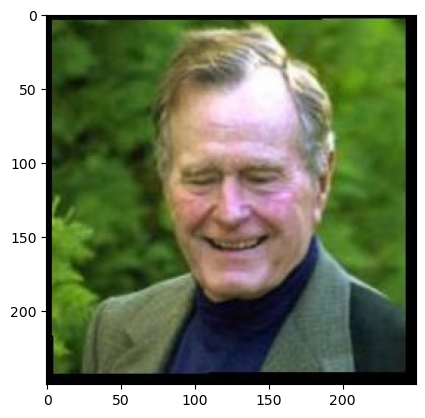

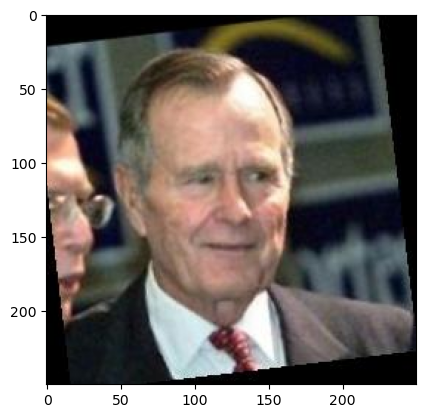

{'verified': True, 'distance': 0.50666805149575, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 65, 'y': 65, 'w': 118, 'h': 118, 'left_eye': None, 'right_eye': None}, 'img2': {'x': 66, 'y': 69, 'w': 112, 'h': 112, 'left_eye': None, 'right_eye': None}}, 'time': 13.17}
They are same


In [21]:
verify(os.path.abspath('data/faces/samples/img11.jpeg'), os.path.abspath('data/faces/samples/img12.jpeg'), 'VGG-Face')

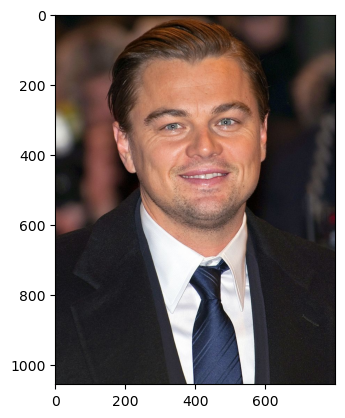

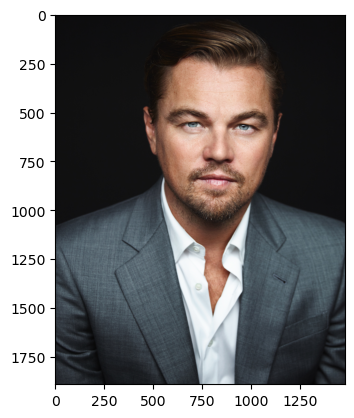

{'verified': True, 'distance': 0.4955330908047524, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 186, 'y': 131, 'w': 457, 'h': 457, 'left_eye': (146, 189), 'right_eye': (299, 181)}, 'img2': {'x': 495, 'y': 291, 'w': 687, 'h': 687, 'left_eye': (205, 277), 'right_eye': (468, 287)}}, 'time': 4.07}
They are same


In [23]:
verify(os.path.abspath('data/faces/samples/img3.jpg'), os.path.abspath('data/faces/samples/img4.jpg'), 'VGG-Face')

In [26]:
embedding_objs = DeepFace.represent(
  img_path = os.path.abspath('data/faces/samples/img11.jpeg')
)
print(embedding_objs)

[{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.055577513898130745, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0085277605323545, 0.0, 0.0, 0.0, 0.0, 0.020885460308233714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026031821832747635, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026001601181361276, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07341184829794326, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006874931800007027, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07104488938597751, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08338806897372542, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00954718174613814, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007051669077620256, 0.0, 0.0, 0.0, 0.0

# Facial Attribute Analysis using Deepface

Action: age:   0%|                                                                   | 0/3 [00:00<?, ?it/s]

24-10-17 17:59:11 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /Users/yovannynogales/.deepface/weights/age_model_weights.h5
100%|███████████████████████████████████████████████████████████████████| 539M/539M [04:01<00:00, 2.23MB/s]
Action: gender:  33%|██████████████████▎                                    | 1/3 [04:18<08:36, 258.03s/it]

24-10-17 18:03:26 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /Users/yovannynogales/.deepface/weights/gender_model_weights.h5
100%|███████████████████████████████████████████████████████████████████| 537M/537M [03:04<00:00, 2.92MB/s]
Action: emotion:  67%|████████████████████████████████████                  | 2/3 [07:33<03:40, 220.97s/it]

24-10-17 18:06:37 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /Users/yovannynogales/.deepface/weights/facial_expression_model_weights.h5
100%|█████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:02<00:00, 2.75MB/s]
Action: emotion: 100%|██████████████████████████████████████████████████████| 3/3 [07:37<00:00, 152.34s/it]


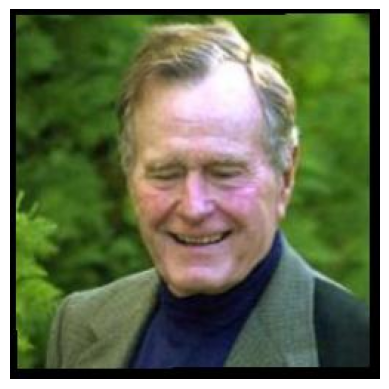

Age: 52
Gender: {'Woman': 0.0008908835297916085, 'Man': 99.99910593032837}
Dominant Emotion: happy


In [31]:
img_path = 'data/faces/samples/img11.jpeg' # Enter Your Image Path
img = cv2.imread(img_path)

result = DeepFace.analyze(img, actions=['age', 'gender', 'emotion'])

result = result[0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f"Age: {result['age']}")
print(f"Gender: {result['gender']}")
print(f"Dominant Emotion: {result['dominant_emotion']}")

24-10-17 18:22:30 - Searching /Users/yovannynogales/Documents/Repositories/Github/yovannynogales/computer-vision-verification-experiments/data/faces/input1.jpeg in 9 length datastore
24-10-17 18:22:31 - find function duration 1.3093550205230713 seconds


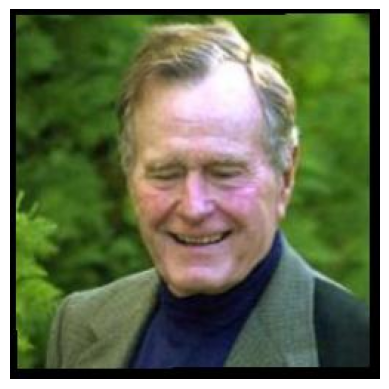

/Users/yovannynogales/Documents/Repositories/Github/yovannynogales/computer-vision-verification-experiments/data/faces/samples/img11.jpeg
0.5563663577485549


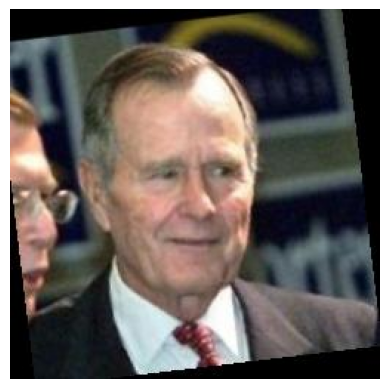

/Users/yovannynogales/Documents/Repositories/Github/yovannynogales/computer-vision-verification-experiments/data/faces/samples/img12.jpeg
0.6463721474059745


In [45]:
results = DeepFace.find(
  img_path = os.path.abspath("data/faces/input1.jpeg"),
  db_path = os.path.abspath("data/faces/samples"),
)[0]

for index, row in results.iterrows():
    file_path = row['identity']
    imgdb = cv2.imread(file_path)
    plt.imshow(cv2.cvtColor(imgdb, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(file_path)
    print(row['distance'])
    